In [25]:
import argparse
import os
import museval
from pathlib import Path
from os import environ as env
import soundfile as sf
import matplotlib.pyplot as plt

In [2]:
# load env variables
%load_ext dotenv
%dotenv -o -v ./config/config_predict.yml
# %reload_ext dotenv

### Load tensorboard logs

In [1]:
# # Clear any logs from previous runs
# rm -rf ./../data/tensorboard
%load_ext tensorboard
%tensorboard --logdir ./logs/waveunet/

In [23]:
label = "mixture.wav_Fe-59.wav"
file_name = f"{str(env['INPUT'])}mixture-23/{label}"
data, samplerate = sf.read(file_name)
target_sources = data

label = "Fe-59.wav"
file_name = f"{str(env['INPUT'])}mixture-23/{label}"
data, samplerate = sf.read(file_name)
pred_sources = data

In [28]:
SDR, ISR, SIR, SAR, _ = museval.metrics.bss_eval(target_sources, target_sources)
SDR

array([[inf]])

### Assess quality of training Fe-59 + other

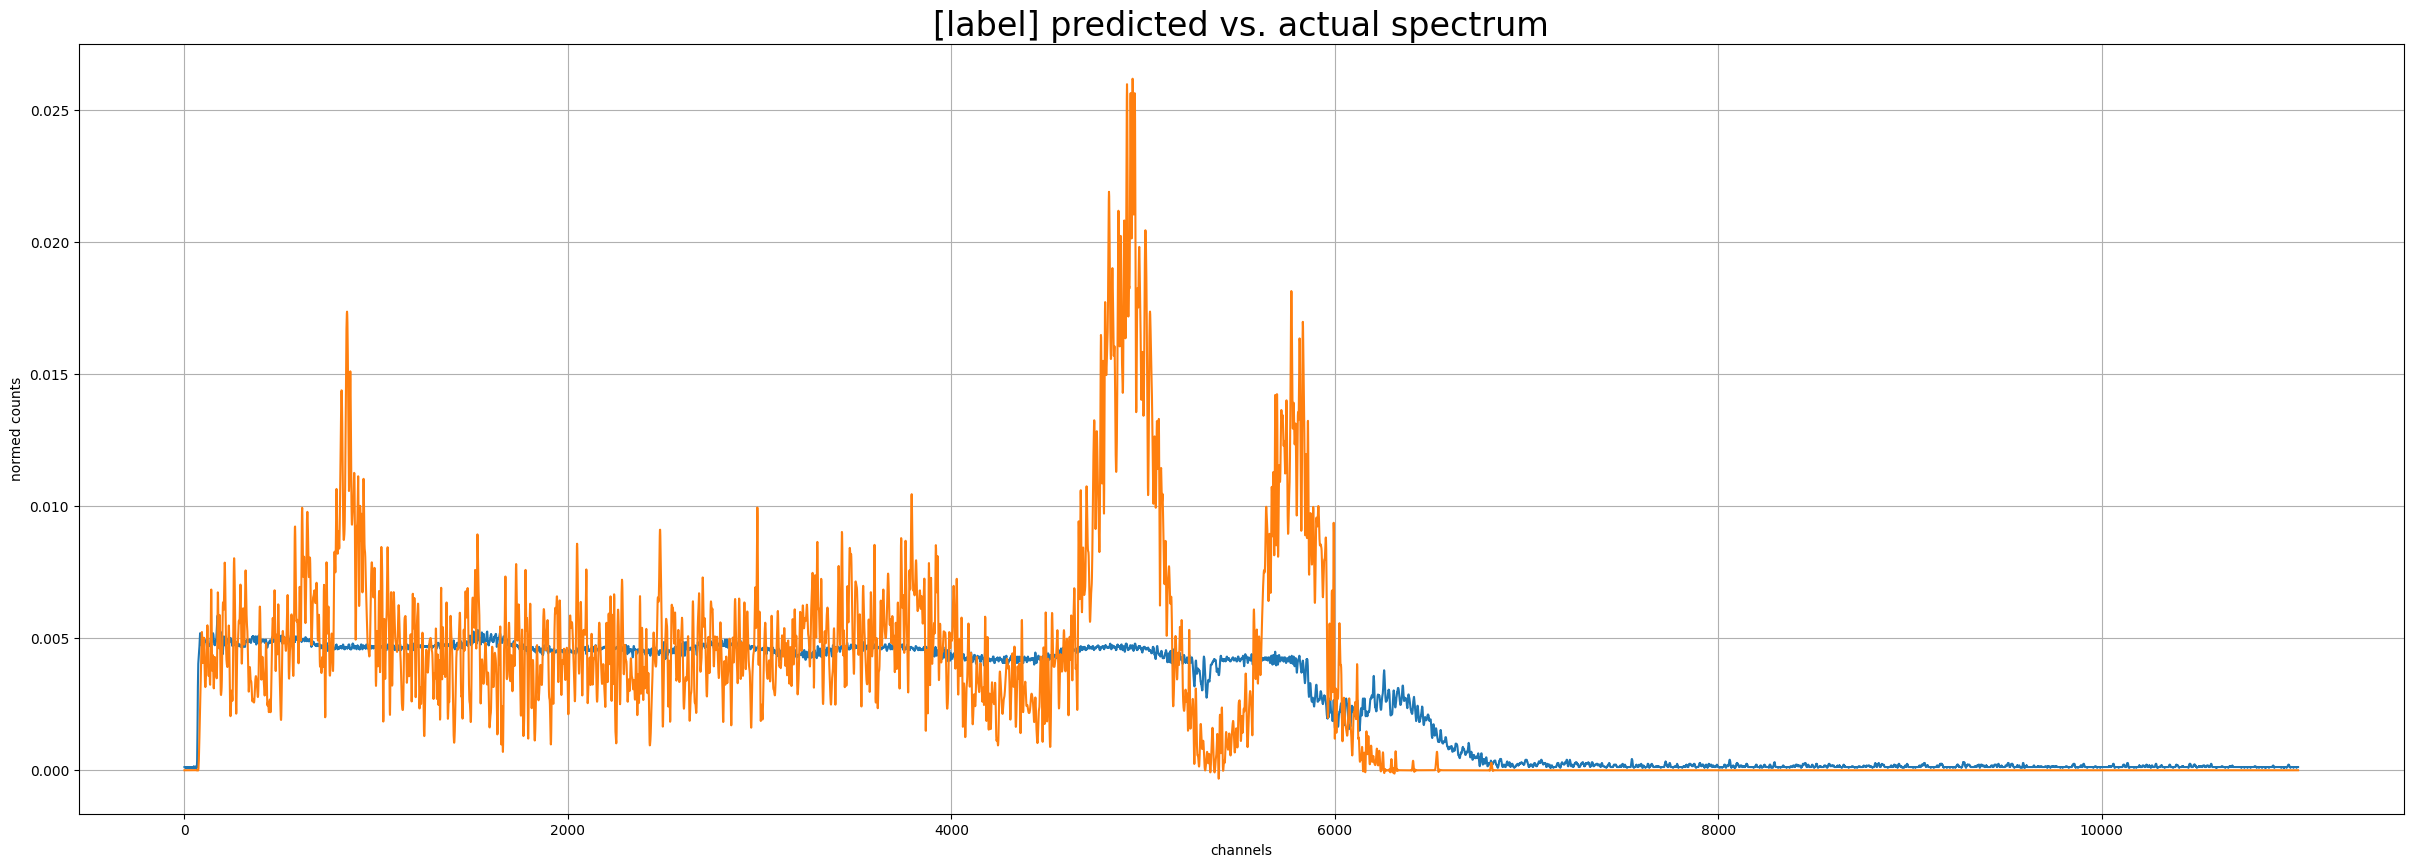

In [22]:
labels = ["mixture.wav_Fe-59.wav", "Fe-59.wav"]

fig, (ax) = plt.subplots(nrows=1, figsize=(30, 10))
for label in labels:
    file_name = f"{str(env['INPUT'])}mixture-23/{label}"
    data, samplerate = sf.read(file_name)
    ax.plot(data)

ax.set_title(f"[label] predicted vs. actual spectrum", size =24)
ax.set_xlabel('channels')
ax.set_ylabel('normed counts')
ax.grid(True)
plt.show()